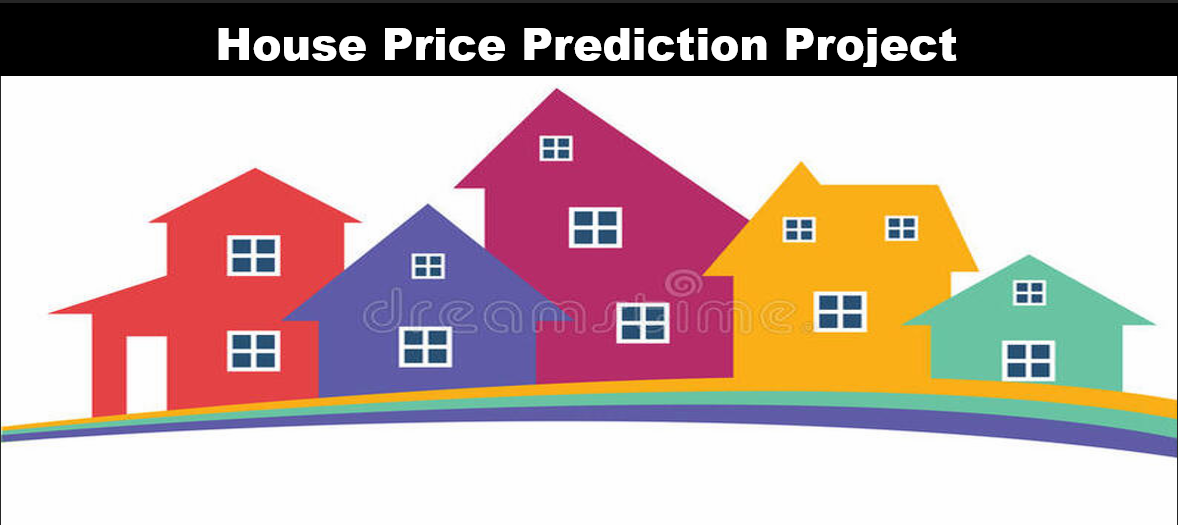

#  **Introduction ABout this Project**
Welcome to the House Price Prediction Challenge, you will test your regression skills by designing an algorithm to accurately predict the house prices in India. Accurately predicting house prices can be a daunting task. The buyers are just not concerned about the size(square feet) of the house and there are various other factors that play a key role to decide the price of a house/property. It can be extremely difficult to figure out the right set of attributes that are contributing to understanding the buyer's behavior as such. This dataset has been collected across various property aggregators across India. In this competition, provided the 12 influencing factors your role as a data scientist is to predict the prices as accurately as possible.

Also, in this competition, you will get a lot of room for feature engineering and mastering advanced regression techniques such as Random Forest, Deep Neural Nets, and various other ensembling techniques.

# **✨✨ Importing Usefull Libraries**

In [4]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [5]:
path = r"D:\ml data by prince\House_price_predictions\msc_training_dataset.csv"
path2 = r"D:\ml data by prince\House_price_predictions\msc_testing_dataset.csv"

In [6]:
train = pd.read_csv(path)
test = pd.read_csv(path2)

In [7]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [8]:
train.shape

(3000, 12)

In [9]:
train.columns

Index(['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access', 'price'],
      dtype='object')

In [10]:
# Checking the Null Vlaues in each Column from table
train.isna().sum()

room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64

In [11]:
# check the Data type of Column from training table
train.dtypes

room            int64
bathroom        int64
kitchen         int64
french_door     int64
backyard        int64
furnished       int64
green_paint     int64
solar_power     int64
woodfloor       int64
qlm_security    int64
club_access     int64
price           int64
dtype: object

In [12]:
# Check the uniquness of Data
train.nunique()

room              5
bathroom          2
kitchen           2
french_door       3
backyard          2
furnished         2
green_paint       2
solar_power       2
woodfloor         2
qlm_security      2
club_access       2
price           856
dtype: int64

In [13]:
# checking the Duplicate values in Table
train.duplicated().sum()

488

In [14]:
train.shape

(3000, 12)

In [15]:
# How to delete the Duplicate rows from table.
train.drop_duplicates(inplace=True)

In [16]:
train.duplicated().sum()

0

In [17]:
train.shape

(2512, 12)

In [18]:
# Show the complete information of dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 2998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          2512 non-null   int64
 1   bathroom      2512 non-null   int64
 2   kitchen       2512 non-null   int64
 3   french_door   2512 non-null   int64
 4   backyard      2512 non-null   int64
 5   furnished     2512 non-null   int64
 6   green_paint   2512 non-null   int64
 7   solar_power   2512 non-null   int64
 8   woodfloor     2512 non-null   int64
 9   qlm_security  2512 non-null   int64
 10  club_access   2512 non-null   int64
 11  price         2512 non-null   int64
dtypes: int64(12)
memory usage: 255.1 KB


In [19]:
# Describing the data
train.describe() # Its Describe the Statistics Five Number Summary

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.00000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,2.991242,1.495223,1.510748,2.001194,0.49164,0.492834,0.490446,0.493232,0.508758,0.486863,0.501194,8609.211783
std,1.424568,0.500077,0.499984,0.813809,0.50003,0.500048,0.500008,0.500054,0.500023,0.499927,0.500098,2222.006893
min,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10197.500000
max,5.000000,2.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [20]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105
5,5,1,2,1,0,0,1,0,1,0,0,8995


# EDA ( Exploratory Data Analysis)

In [22]:
pie = train.groupby("bathroom")["price"].mean().reset_index()
pie

,bathroom,price
0,1,8483.698738
1,2,8737.146302


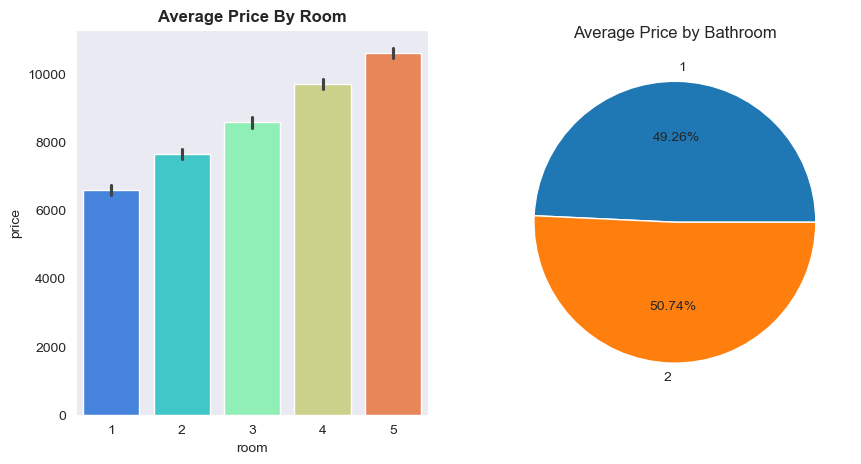

In [23]:
sns.set_style("dark")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data=train,x="room",y="price",palette="rainbow")
plt.title("Average Price By Room",fontweight="bold")

plt.subplot(1,2,2)
plt.pie(pie["price"],labels=pie["bathroom"],autopct="%0.2f%%")
plt.title("Average Price by Bathroom")
plt.show()

### **Insights** :
1. With the help of this Column chart we can see that the Maximum Average Price of House Depenends Number of Room.
2. 

In [25]:
train.sample(2)

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
1965,2,1,2,2,0,1,0,1,1,1,1,10565
1061,4,1,1,2,1,1,0,0,1,0,1,10655


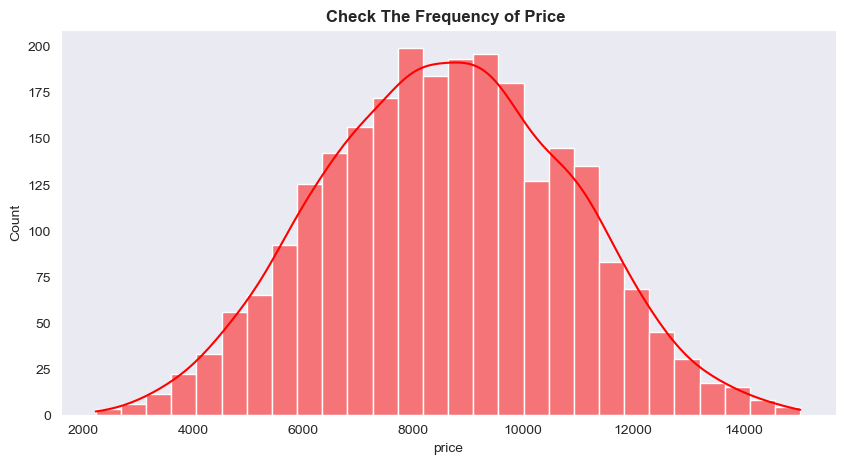

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(data=train,x="price",kde=1,color="red")
plt.title("Check The Frequency of Price ",fontweight="bold")
plt.show()

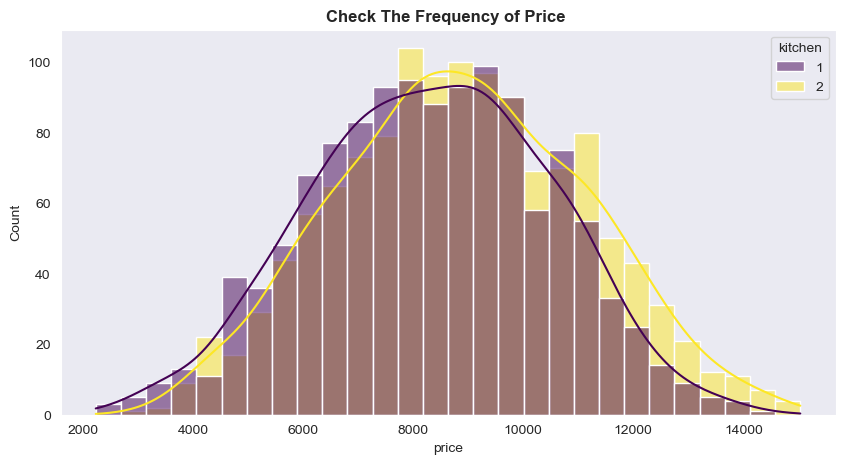

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(data=train,x="price",kde=1,hue="kitchen",palette="viridis")
plt.title("Check The Frequency of Price ",fontweight="bold")
plt.show()

In [28]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105
5,5,1,2,1,0,0,1,0,1,0,0,8995


In [29]:
train.nunique().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11
index,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,5,2,2,3,2,2,2,2,2,2,2,856


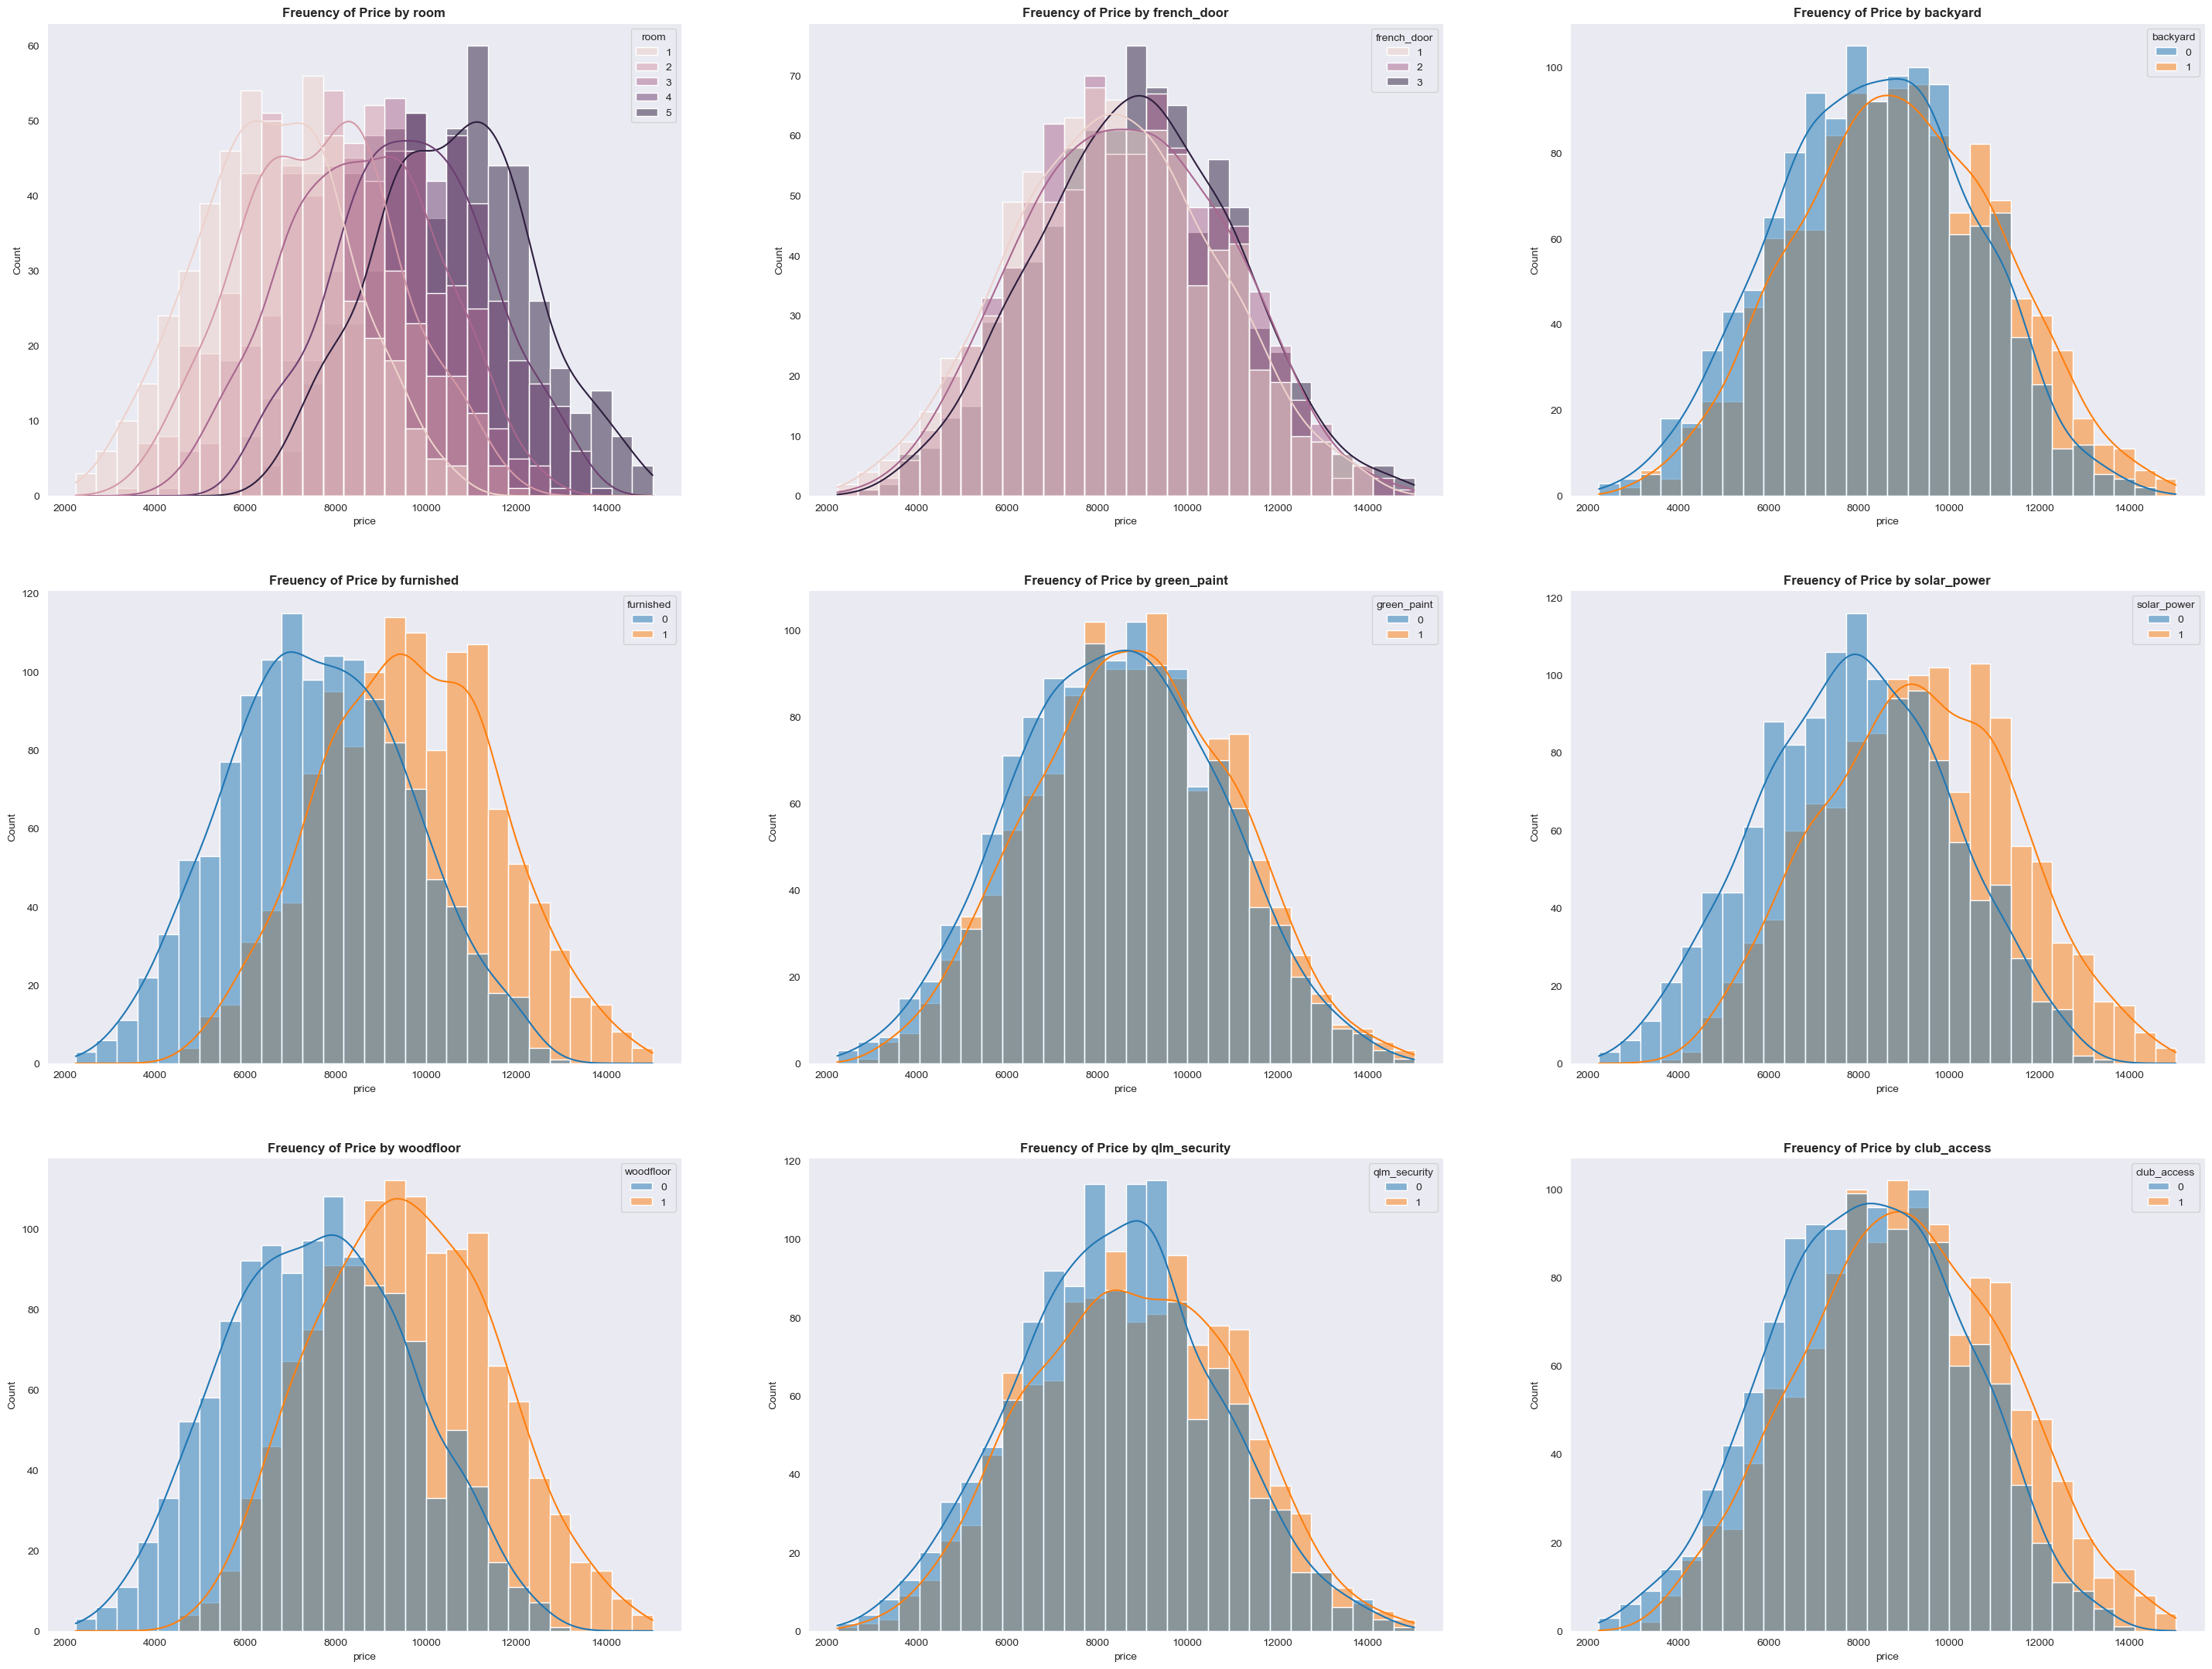

In [30]:
plt.figure(figsize=(36,27))
c = 1
for i in train:
    if i in ("bathroom","kitchen","price"):
        continue
    else:
        plt.subplot(3,3,c)
        sns.histplot(data=train,x="price",hue=i,kde=1)
        plt.title(f"Freuency of Price by {i}",fontweight="bold")
        c+=1
plt.show()

In [31]:
train.shape

(2512, 12)

In [32]:
train.head(3)

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105


In [33]:

for i in train:
    if i=="price":
        continue
    else:
        print("="*40)
        val = train[i].value_counts().reset_index()
        print(val)
        print("="*40)

   room  count
0     2    517
1     5    515
2     1    509
3     3    488
4     4    483
   bathroom  count
0         1   1268
1         2   1244
   kitchen  count
0        2   1283
1        1   1229
   french_door  count
0            2    849
1            3    833
2            1    830
   backyard  count
0         0   1277
1         1   1235
   furnished  count
0          0   1274
1          1   1238
   green_paint  count
0            0   1280
1            1   1232
   solar_power  count
0            0   1273
1            1   1239
   woodfloor  count
0          1   1278
1          0   1234
   qlm_security  count
0             0   1289
1             1   1223
   club_access  count
0            1   1259
1            0   1253


In [34]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105
5,5,1,2,1,0,0,1,0,1,0,0,8995


In [35]:
train.corr()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
room,1.000000,0.007768,0.010197,0.009971,-0.005135,0.004384,-0.026955,-0.014619,0.015203,-0.016937,0.014549,0.644894
bathroom,0.007768,1.000000,-0.014926,0.000503,-0.002549,-0.004915,0.023708,-0.021629,-0.003018,-0.023349,-0.013513,0.057040
kitchen,0.010197,-0.014926,1.000000,-0.016181,0.000360,0.009069,-0.017909,0.006663,-0.005952,0.024464,0.006320,0.122473
french_door,0.009971,0.000503,-0.016181,1.000000,-0.007315,0.003446,0.004432,0.009317,0.008293,-0.022965,-0.008321,0.096599
backyard,-0.005135,-0.002549,0.000360,-0.007315,1.000000,0.000557,0.000477,0.002959,0.013832,-0.021150,-0.023849,0.123133
furnished,0.004384,-0.004915,0.009069,0.003446,0.000557,1.000000,0.044325,-0.016917,0.001844,-0.021883,0.019941,0.453719
green_paint,-0.026955,0.023708,-0.017909,0.004432,0.000477,0.044325,1.000000,-0.005833,-0.006037,0.000294,-0.008714,0.079985
solar_power,-0.014619,-0.021629,0.006663,0.009317,0.002959,-0.016917,-0.005833,1.000000,-0.013301,0.002830,-0.006338,0.320911
woodfloor,0.015203,-0.003018,-0.005952,0.008293,0.013832,0.001844,-0.006037,-0.013301,1.000000,0.026747,0.002347,0.435437
qlm_security,-0.016937,-0.023349,0.024464,-0.022965,-0.021150,-0.021883,0.000294,0.002830,0.026747,1.000000,0.020771,0.090566


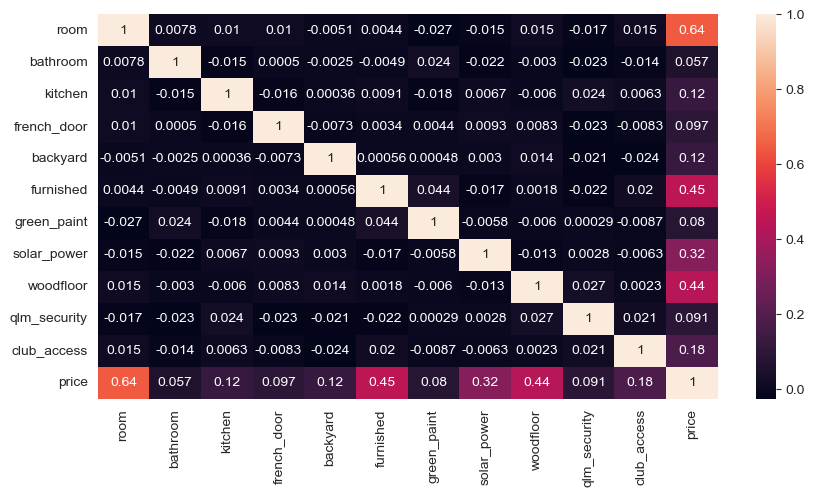

In [36]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [37]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105
5,5,1,2,1,0,0,1,0,1,0,0,8995


In [38]:
x_train = train.drop(columns="price")
y_train = train[["price"]]

In [39]:
x_train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,3,1,2,1,1,0,1,0,0,1,1
1,5,2,2,2,1,0,0,0,0,1,1
3,1,2,1,2,0,0,0,0,1,1,0
4,2,1,2,3,1,1,0,0,1,1,0
5,5,1,2,1,0,0,1,0,1,0,0


In [42]:
test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [44]:
x_test = test.drop(columns="price")
y_test = test[["price"]]

In [46]:
x_test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,1,1,1,3,0,0,1,1,0,1,0
1,5,1,1,2,0,0,0,0,0,1,1
2,5,1,1,3,0,0,0,1,1,1,1
3,4,2,2,1,0,1,1,0,0,1,0
4,5,2,1,1,0,1,1,1,0,0,1


In [48]:
y_test.head()

,price
0,5068
1,7658
2,11318
3,8858
4,11178


# Builing the Machine Learning Algorithms

In [51]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [53]:
ac =  linear.score(x_train,y_train)
print("Accuracy of Training Dataset : ",ac)

Accuracy of Training Dataset :  1.0


In [55]:
ac2 = linear.score(x_test,y_test)
print("Accuracy of Test Dataset : ",ac2)

Accuracy of Test Dataset :  0.9999656095212318


In [57]:
pred = linear.predict(x_test)

In [59]:
pred.T

array([[ 5055.,  7645., 11305.,  8845., 11165., 11375., 11735.,  6835.,
         7815.,  5895.,  9095.,  8295.,  6695., 11305.,  7205.,  9165.,
         8775., 12745.,  9745.,  6655.,  9325.,  7785.,  7075.,  4315.,
         9965.,  6855.,  7335.,  8895.,  6325.,  9695.,  6645., 10305.,
        10485.,  8195.,  7565., 10355.,  9475., 11115.,  9765., 12825.,
         6295.,  5125.,  9825.,  8895., 11715.,  6205.,  4095., 11475.,
         9565.,  5535., 11455., 10395.,  4125.,  7735., 13055.,  9595.,
         6445.,  8365., 10155.,  7835.,  8275., 14305.,  7075.,  8435.,
        12625.,  7095., 11435., 10555., 10095.,  5535.,  8235., 12095.,
         4215.,  5865.,  9355.,  9245.,  7065., 11625., 10855., 10825.,
         8785.,  7355., 11865.,  8315., 11805.,  5945.,  8775.,  8275.,
         7165.,  8245.,  7575., 11925., 11965.,  7975.,  6645., 10795.,
        11235.,  8195.,  9355.,  7445.,  7235.,  8935.,  4575.,  9675.,
         5735.,  5075., 10645.,  9705.,  8605., 12515.,  8165., 